Loading database at datasets/unwrapped_2021-02-05_circle_slow_1...
Database contains 656 images
Maximum angle offset for training: 0.840281°
Loading database at datasets/unwrapped_2021-02-05_circle_slow_2...
Database contains 705 images
Using cached result from '.navbench_cache/ipython_get_ridf_headings_f746a3f7f76abd3f7ed159974a95c0600fcc29456ebd40c46b8658ce28d09aea.pkl'
get_ridf_headings() took 21.8533 s to run (without caching)
Loading database at datasets/unwrapped_2021-02-05_circle_slow_2...
Database contains 705 images
Using cached result from '.navbench_cache/ipython_get_ridf_headings_f746a3f7f76abd3f7ed159974a95c0600fcc29456ebd40c46b8658ce28d09aea.pkl'
get_ridf_headings() took 21.8533 s to run (without caching)
Loading database at datasets/unwrapped_2021-02-19_circle_fast_obstacle_2...
Database contains 485 images
Using cached result from '.navbench_cache/ipython_get_ridf_headings_5d481457daece130303af9cbe9d37d9f013890c6ddd48ace81c42ebd2f5c0766.pkl'
get_ridf_headings() took 15.

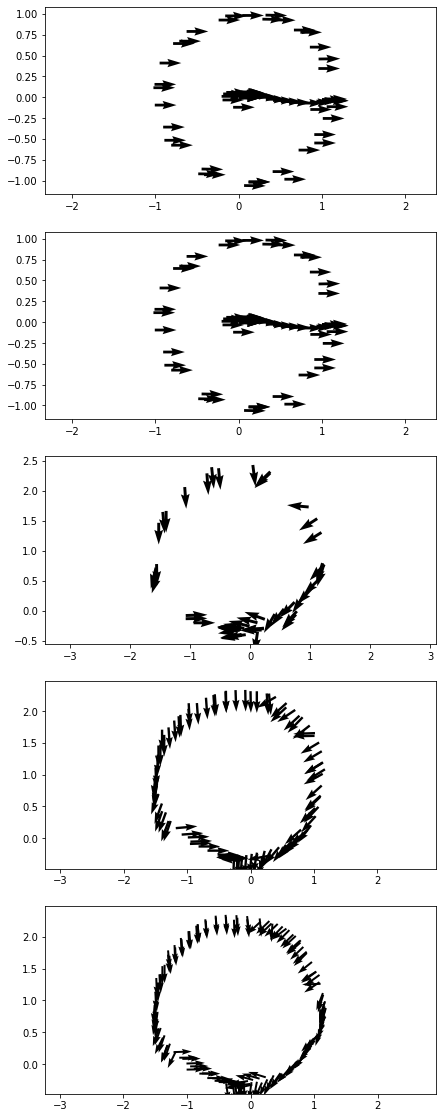

In [1]:
import sys
sys.path.append('../navbench')

from time import time
import matplotlib.pyplot as plt
import numpy as np

import navbench as nb
from navbench import imgproc as ip

PREPROC = ip.resize(360, 75)
TEST_DBS = ('2021-02-05_circle_slow_2', '2021-02-05_circle_slow_2', '2021-02-19_circle_fast_obstacle_2', '2021-02-19_circle_slow_obstacle_1', '2021-02-19_circle_slow_obstacle_2')

db_train = nb.Database('datasets/unwrapped_2021-02-05_circle_slow_1')
dbs_test = (nb.Database('datasets/unwrapped_' + name) for name in TEST_DBS)

print('Maximum angle offset for training: %g°' % np.max(np.abs(db_train.heading)))

_, axes = plt.subplots(len(TEST_DBS), figsize=(7, 20))
for ax, db_test in zip(axes, dbs_test):
    test_entries = range(0, len(db_test), 10)
    snapshots = db_train.read_images(entries=range(0, len(db_train), 5), preprocess=PREPROC)
    images = db_test.read_images(entries=test_entries, preprocess=PREPROC)

    headings = nb.get_ridf_headings(images, snapshots)
    u = np.cos(headings)
    v = np.sin(headings)
    ax.quiver(db_test.x[test_entries], db_test.y[test_entries], u, v)
    ax.axis('equal');